In [1]:
import stata_setup
stata_setup.config("C:/Program Files/Stata18/", "mp")


  ___  ____  ____  ____  ____ ®
 /__    /   ____/   /   ____/      Stata 18.0
___/   /   /___/   /   /___/       MP—Parallel Edition

 Statistics and Data Science       Copyright 1985-2023 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-782-8272        https://www.stata.com
                                   979-696-4600        service@stata.com

Stata license: Unlimited-user 2-core network, expiring 21 Apr 2025
Serial number: 501809307678
  Licensed to: Yu Zhang
               Peking University

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. More than 2 billion observations are allowed; see help obs_advice.
      3. Maximum number of variables is set to 5,000 but can be increased;
          see help set_maxvar.


In [2]:
import akshare as ak

In [3]:
income_statement = ak.stock_lrb_em(date= "20231231")

  0%|          | 0/11 [00:00<?, ?it/s]

In [4]:
%%stata
frame change default
cap frame drop income_statement
frame create income_statement
frame change income_statement


. frame change default

. cap frame drop income_statement

. frame create income_statement

. frame change income_statement

. 


In [5]:
%%stata -d income_statement
frame income_statement: describe


Contains data
 Observations:         5,155                  
    Variables:            15                  
-------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
序号            long    %12.0g                
股票代码        str9    %9s                   
股票简称        str12   %12s                  
净利润          double  %10.0g                
净利润同比      double  %10.0g                
营业总收入      double  %10.0g                
营业总收入同比  double  %10.0g                
营业总支~业支出 double  %10.0g                
营业总支出销~用 double  %10.0g                
营业总支出管~用 double  %10.0g                
营业总支出财~用 double  %10.0g                
营业总支~总支出 double  %10.0g                
营业利润        double  %10.0g                
利润总额        double  %10.0g                
公告日期        str10   %10s                  
-

In [6]:
%%stata
frame income_statement: codebook 公告日期


-------------------------------------------------------------------------------
公告日期                                                            (unlabeled)
-------------------------------------------------------------------------------

                  Type: String (str10)

         Unique values: 163                       Missing "": 0/5,155

              Examples: "2024-03-30"
                        "2024-04-20"
                        "2024-04-25"
                        "2024-04-27"


In [7]:
%%stata
frame income_statement: cap drop ann_date
frame income_statement: gen ann_date = date(公告日期,"YMD")
frame income_statement: format ann_date %td
frame income_statement: codebook ann_date


. frame income_statement: cap drop ann_date

. frame income_statement: gen ann_date = date(公告日期,"YMD")

. frame income_statement: format ann_date %td

. frame income_statement: codebook ann_date

-------------------------------------------------------------------------------
ann_date                                                            (unlabeled)
-------------------------------------------------------------------------------

                  Type: Numeric daily date (float)

                 Range: [23402,23701]                 Units: 1
       Or equivalently: [27jan2024,21nov2024]         Units: days
         Unique values: 163                       Missing .: 0/5,155

                  Mean: 23486.7 = 20apr2024(+ 18 hours)
             Std. dev.: 24.9096
           Percentiles:       10%        25%        50%        75%        90%
                            23463      23477      23489      23493      23496
                        28mar2024  11apr2024  23apr2024  27apr2024 

In [8]:
%%stata
frame income_statement: save "./Rfiles/income_statement.dta", replace


file ./Rfiles/income_statement.dta saved


In [9]:
%%stata
frame income_statement: use "./Rfiles/income_statement.dta", clear
frame income_statement: list in 1/2
frame income_statement: sum *


. frame income_statement: use "./Rfiles/income_statement.dta", clear

. frame income_statement: list in 1/2

     +----------------------------------------------------------------+
  1. | 序号 | 股票代码 | 股票简称 |    净利润 | 净利润~比 | 营业总~入 |
     |    1 |   603395 |   红四方 | 1.584e+08 | 32.774866 | 3.899e+09 |
     |----------------------------------------------------------------|
     |  营业总~比 | 营~业支出 | 营~售费用  | 营~理费用  |  营~务费用  |
     | -6.4902506 | 3.409e+09 |  96139022  | 1.183e+08  |   12386242  |
     |------------------------+------------+--------------------------|
     | 营~总支出 |  营业利润  |  利润总额  |   公告日期  |  ann_date  |
     | 3.737e+09 | 1.717e+08  | 1.725e+08  | 2024-11-21  | 21nov2024  |
     +----------------------------------------------------------------+

     +----------------------------------------------------------------+
  2. | 序号 | 股票代码 | 股票简称 |    净利润 | 净利润~比 | 营业总~入 |
     |    2 |   301617 | 博苑股份 | 1.821e+08 | 3.2768686 | 1.025e+09 |
     |--------------------------------

In [10]:
%%stata
frame change default
cap frame drop ourdata
frame copy income_statement ourdata, replace
frame ourdata: rename 营业总支出* *
frame ourdata: describe


. frame change default

. cap frame drop ourdata

. frame copy income_statement ourdata, replace
(note: frame ourdata not found)

. frame ourdata: rename 营业总支出* *

. frame ourdata: describe

Contains data from ./Rfiles/income_statement.dta
 Observations:         5,155                  
    Variables:            16                  21 Nov 2024 09:34
-------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
序号            long    %12.0g                
股票代码        str9    %9s                   
股票简称        str12   %12s                  
净利润          double  %10.0g                
净利润同比      double  %10.0g                
营业总收入      double  %10.0g                
营业总收入同比  double  %10.0g                
营业支出        double  %10.0g                
销售费用        double  %10.0g                
管

In [11]:
%%stata
frame change default
cap frame drop ourdata
frame copy income_statement ourdata, replace
frame ourdata: keep 股票代码 股票简称 ann_date 营业总收入同比
frame ourdata: describe


. frame change default

. cap frame drop ourdata

. frame copy income_statement ourdata, replace
(note: frame ourdata not found)

. frame ourdata: keep 股票代码 股票简称 ann_date 营业总收入同比

. frame ourdata: describe

Contains data from ./Rfiles/income_statement.dta
 Observations:         5,155                  
    Variables:             4                  21 Nov 2024 09:34
-------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
股票代码        str9    %9s                   
股票简称        str12   %12s                  
营业总收入同比  double  %10.0g                
ann_date        float   %td                   
-------------------------------------------------------------------------------
Sorted by: 
     Note: Dataset has changed since last saved.

. 


In [12]:
%%stata
frame change default
cap frame drop ourdata
frame copy income_statement ourdata, replace
frame ourdata: sort ann_date
frame ourdata: list ann_date in 1/5
frame ourdata: list ann_date if inrange(_n,_N-4,_N)


. frame change default

. cap frame drop ourdata

. frame copy income_statement ourdata, replace
(note: frame ourdata not found)

. frame ourdata: sort ann_date

. frame ourdata: list ann_date in 1/5

     +-----------+
     |  ann_date |
     |-----------|
  1. | 27jan2024 |
  2. | 27jan2024 |
  3. | 07feb2024 |
  4. | 07feb2024 |
  5. | 22feb2024 |
     +-----------+

. frame ourdata: list ann_date if inrange(_n,_N-4,_N)

      +-----------+
      |  ann_date |
      |-----------|
5151. | 14nov2024 |
5152. | 15nov2024 |
5153. | 19nov2024 |
5154. | 20nov2024 |
5155. | 21nov2024 |
      +-----------+

. 


In [13]:
%%stata
frame change default
cap frame drop ourdata
frame copy income_statement ourdata, replace
frame ourdata: keep if substr(股票代码,1,1)=="3" // only 创业板企业
frame ourdata: codebook 股票代码


. frame change default

. cap frame drop ourdata

. frame copy income_statement ourdata, replace
(note: frame ourdata not found)

. frame ourdata: keep if substr(股票代码,1,1)=="3" // only 创业板企业
(3,788 observations deleted)

. frame ourdata: codebook 股票代码

-------------------------------------------------------------------------------
股票代码                                                            (unlabeled)
-------------------------------------------------------------------------------

                  Type: String (str9), but longest is str6

         Unique values: 1,367                     Missing "": 0/1,367

              Examples: "300288"
                        "300578"
                        "300862"
                        "301162"

. 


In [14]:
%%stata
cap which winsor2
if _rc ssc install winsor2
help winsor2


. cap which winsor2

. if _rc ssc install winsor2

. help winsor2

-------------------------------------------------------------------------------
help for winsor2                                                         (blog)
-------------------------------------------------------------------------------

Winsorizing or Trimming variables
---------------------------------


Syntax
------

    winsor2 varlist [if] [in], [ suffix(string) replace trim cuts(# #)
                   by(groupvar) label ]


Description
-----------

    winsor2 winsorize or trim (if trim option is specified) the variables in 
    varlist at particular percentiles specified by option cuts(#1 #2).  In
    defult, new variables will be generated with a suffix "_w" or "_tr",
    which can be changed by specifying suffix() option.  The replace option
    replaces the variables with their winsorized or trimmed ones.

        +---------------------------------------------+
    ----+ Difference between winsorizing an

In [15]:
%%stata
frame change default
cap frame drop ourdata
frame copy income_statement ourdata, replace
frame ourdata: rename 营业总支出* *
frame ourdata: gen 上市板块=substr(股票代码,1,1)
frame ourdata: gen 毛利率=1-营业支出/营业总收入
frame ourdata: gen 净利率=净利润/营业总收入
frame ourdata: gen 销售费用比率=销售费用/营业总收入
frame ourdata: gen 管理费用比率=管理费用/营业总收入
frame ourdata: winsor2 营业总收入同比, cuts(1 99) suffix(_win) 
frame ourdata: winsor2 净利润同比, cuts(1 99) suffix(_win) 
frame ourdata: winsor2 销售费用比率, cuts(1 99) suffix(_win) 
frame ourdata: gen log10营业总收入=ln(营业总收入)/ln(10)
frame ourdata: sum *
frame ourdata: tabstat 营业总收入同比* 净利润同比* log10营业总收入, stat(n mean sd min max) col(stat) varwidth(20)


. frame change default

. cap frame drop ourdata

. frame copy income_statement ourdata, replace
(note: frame ourdata not found)

. frame ourdata: rename 营业总支出* *

. frame ourdata: gen 上市板块=substr(股票代码,1,1)

. frame ourdata: gen 毛利率=1-营业支出/营业总收入
(103 missing values generated)

. frame ourdata: gen 净利率=净利润/营业总收入
(1 missing value generated)

. frame ourdata: gen 销售费用比率=销售费用/营业总收入
(169 missing values generated)

. frame ourdata: gen 管理费用比率=管理费用/营业总收入
(7 missing values generated)

. frame ourdata: winsor2 营业总收入同比, cuts(1 99) suffix(_win) 

. frame ourdata: winsor2 净利润同比, cuts(1 99) suffix(_win) 

. frame ourdata: winsor2 销售费用比率, cuts(1 99) suffix(_win) 

. frame ourdata: gen log10营业总收入=ln(营业总收入)/ln(10)
(2 missing values generated)

. frame ourdata: sum *

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
        序号 |      5,155        2578    1488.265          1       5155
    股票代码 |          0
 

In [16]:
%stata frame ourdata: tab 上市板块


     上市板 |
         块 |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |      1,503       29.16       29.16
          3 |      1,367       26.52       55.67
          6 |      2,285       44.33      100.00
------------+-----------------------------------
      Total |      5,155      100.00



. frame ourdata: twoway (scatter 营业总收入同比_win log10营业总收入 if 上市板块
> =="0", mcolor(blue%10)) ///
>                (scatter 营业总收入同比_win log10营业总收入 if 上市板块=="3", 
> mcolor(red%10)) ///
>                (scatter 营业总收入同比_win log10营业总收入 if 上市板块=="6", 
> mcolor(green%10)) ///
>                (lfit    营业总收入同比_win log10营业总收入 if 上市板块=="0", 
> lcolor(blue)) ///
>                (lfit    营业总收入同比_win log10营业总收入 if 上市板块=="3", 
> lcolor(red)) ///
>                (lfit    营业总收入同比_win log10营业总收入 if 上市板块=="6", 
> lcolor(green)), ///
>                title("营收增长率与营收规模的关系") ytitle("营业总收入同比增长
> 率") xtitle("营业总收入 log10") ///
>                legend(order(4 "深证主板" 5 "创业板" 6 "上证主板"))

. 


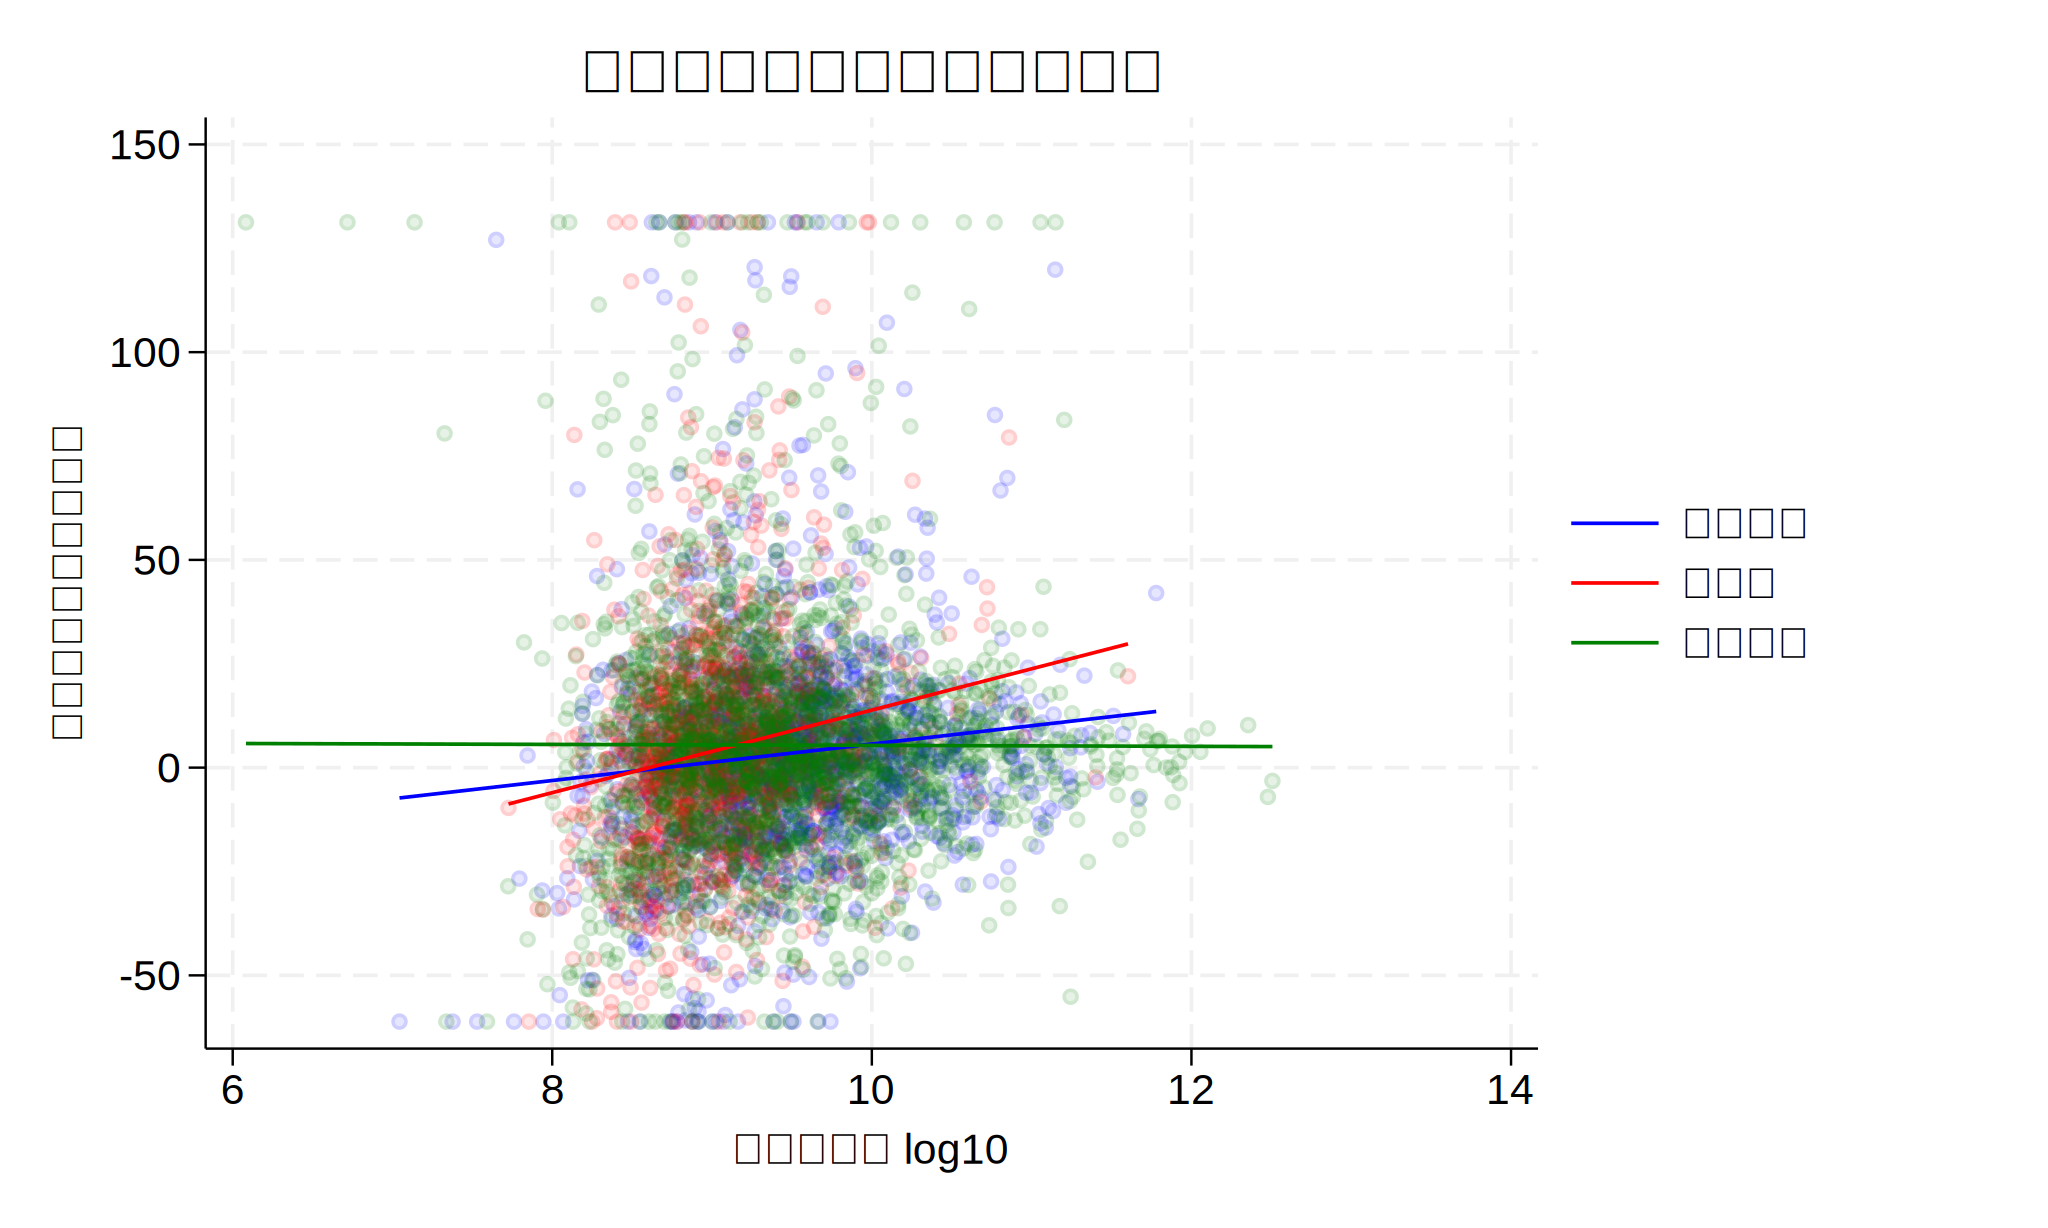

In [18]:
%%stata 
frame ourdata: twoway (scatter 营业总收入同比_win log10营业总收入 if 上市板块=="0", mcolor(blue%10)) ///
               (scatter 营业总收入同比_win log10营业总收入 if 上市板块=="3", mcolor(red%10)) ///
               (scatter 营业总收入同比_win log10营业总收入 if 上市板块=="6", mcolor(green%10)) ///
               (lfit    营业总收入同比_win log10营业总收入 if 上市板块=="0", lcolor(blue)) ///
               (lfit    营业总收入同比_win log10营业总收入 if 上市板块=="3", lcolor(red)) ///
               (lfit    营业总收入同比_win log10营业总收入 if 上市板块=="6", lcolor(green)), ///
               title("营收增长率与营收规模的关系") ytitle("营业总收入同比增长率") xtitle("营业总收入 log10") ///
               legend(order(4 "深证主板" 5 "创业板" 6 "上证主板"))


. frame ourdata: twoway (scatter 营业总收入同比_win 销售费用比率_win if 上市板
> 块=="0", mcolor(blue%10)) ///
>                (scatter 营业总收入同比_win 销售费用比率_win if 上市板块=="3",
>  mcolor(red%10)) ///
>                (scatter 营业总收入同比_win 销售费用比率_win if 上市板块=="6",
>  mcolor(green%10)) ///
>                (lfit    营业总收入同比_win 销售费用比率_win if 上市板块=="0",
>  lcolor(blue)) ///
>                (lfit    营业总收入同比_win 销售费用比率_win if 上市板块=="3",
>  lcolor(red)) ///
>                (lfit    营业总收入同比_win 销售费用比率_win if 上市板块=="6",
>  lcolor(green)), ///
>                title("营收增长率与销售费用比率的关系") ytitle("营业总收入同比
> 增长率") xtitle("销售费用比率") ///
>                legend(order(4 "深证主板" 5 "创业板" 6 "上证主板"))

. 


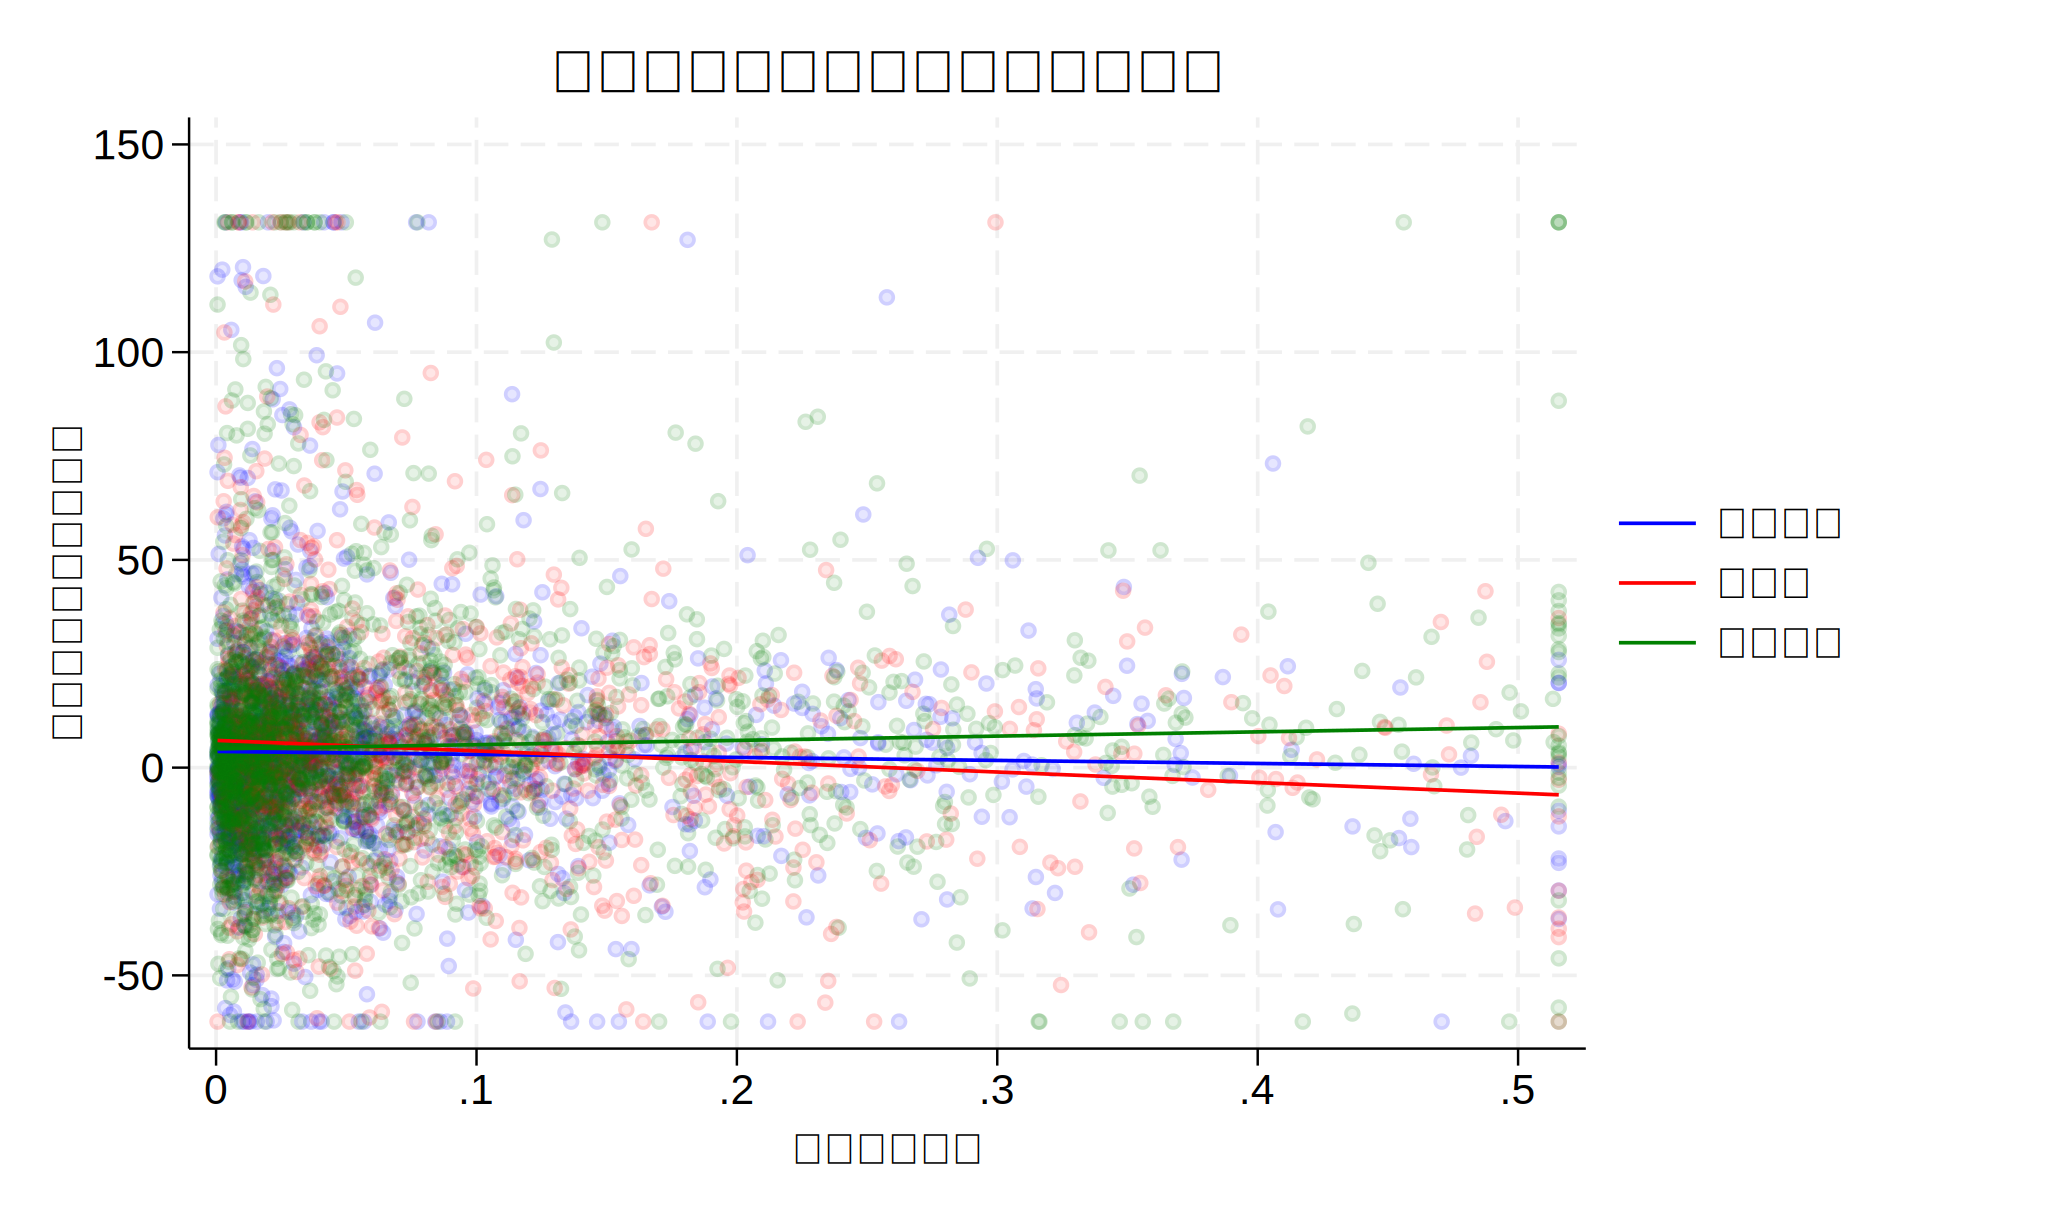

In [19]:
%%stata 
frame ourdata: twoway (scatter 营业总收入同比_win 销售费用比率_win if 上市板块=="0", mcolor(blue%10)) ///
               (scatter 营业总收入同比_win 销售费用比率_win if 上市板块=="3", mcolor(red%10)) ///
               (scatter 营业总收入同比_win 销售费用比率_win if 上市板块=="6", mcolor(green%10)) ///
               (lfit    营业总收入同比_win 销售费用比率_win if 上市板块=="0", lcolor(blue)) ///
               (lfit    营业总收入同比_win 销售费用比率_win if 上市板块=="3", lcolor(red)) ///
               (lfit    营业总收入同比_win 销售费用比率_win if 上市板块=="6", lcolor(green)), ///
               title("营收增长率与销售费用比率的关系") ytitle("营业总收入同比增长率") xtitle("销售费用比率") ///
               legend(order(4 "深证主板" 5 "创业板" 6 "上证主板"))